Imagine language as a flowing river of words. Language models try to predict what word comes next, based on the words they've already seen. It's like completing a friend's sentence before they finish it!

### **1.N-Gram**

N-grams are like detectives in the land of language, constantly observing and analyzing word patterns to predict what comes next. They break down text into sequences of n words, studying how these sequences follow each other to make educated guesses about future words. Understanding them is crucial for anyone wanting to delve into language modeling, so let's dive deeper!

![](https://www.kdnuggets.com/wp-content/uploads/agarwal_ngram_language_modeling_natural_language_processing_2.png)

The Basics:

- **N**: This stands for the number of words in the sequence. So, a bigram (n=2) focuses on pairs of words like "the house," while a trigram (n=3) analyzes sequences like "I love to read."
- **Frequency**: N-gram models count how often these sequences appear in a given text corpus. Imagine them tallying occurrences of word pairs and triplets like a meticulous accountant.
- **Prediction**: Based on these counts, n-grams predict the most likely word to follow a specific sequence. If they see "I love," their prediction might be "pizza" based on previous observations of this trigram appearing frequently.

![](https://miro.medium.com/v2/resize:fit:1400/1*Pad3hzFEHZMVKCcL1EemVw.png)

#### Strengths:

- **Simple and efficient**: N-grams are easy to calculate and require minimal computational resources, making them a good starting point for language modeling.
- **Effective for short-range predictions**: When dealing with smaller chunks of text, like phrases or sentence beginnings, n-grams can be quite accurate in predicting the next word.
- **Useful for tasks like speech recognition and text correction**: Their focus on word patterns helps identify common sequences for specific tasks.

#### Limitations:

- **Ignores long-range dependencies**: N-grams only consider the immediate past, leading to struggles with complex sentences where meaning depends on distant words.
- **Limited context**: They don't capture the broader context of a sentence, leading to potentially nonsensical predictions in certain situations.
- **Data-dependent**: Their accuracy heavily relies on the quality and size of the text corpus they were trained on.

#### Examples:

- **Bigram**: Let's analyze the sentence "The quick brown fox jumps over the lazy dog." "The quick" is a bigram, and the model, based on its training data, might predict "brown" as the next word.
- **Trigram**: If we consider "jumps over the," a trigram, the model could predict "lazy" as the next word with higher confidence than just based on the "over the" bigram.




In [1]:
from nltk import ngrams
from collections import Counter
import random

# Sample text
text = "Language modeling with N-grams is a simple yet effective approach."

# Step 1: Tokenize the text into words
words = text.split()

# Step 2: Generate N-grams
n = 2  # Choose the size of N-grams
ngrams_list = list(ngrams(words, n))

# Step 3: Count the occurrences of N-grams
ngrams_counts = Counter(ngrams_list)

# Step 4: Predict the next word based on the last N-1 words
input_ngram = random.choice(ngrams_list)
predicted_next_word = max(ngrams_counts, key=lambda x: (x[:-1] == input_ngram[-(n-1):], ngrams_counts[x]))

# Display the results
print("N-grams:", ngrams_list)
print("Predicted Next Word:", predicted_next_word[-1])

N-grams: [('Language', 'modeling'), ('modeling', 'with'), ('with', 'N-grams'), ('N-grams', 'is'), ('is', 'a'), ('a', 'simple'), ('simple', 'yet'), ('yet', 'effective'), ('effective', 'approach.')]
Predicted Next Word: yet


In [2]:
import spacy
import plotly.express as px
from plotly.subplots import make_subplots  # Add this import
import plotly.graph_objects as go
from nltk import ngrams
from collections import Counter
import random

# Sample text
text = "Language modeling with N-grams is a simple yet effective approach."

# Tokenize the text into words using spaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
words = [token.text for token in doc]

# Choose the sizes of N-grams
n_values = [2, 3, 4]

# Create subplots with random colors for each N-gram size
fig = make_subplots(rows=len(n_values), cols=1, subplot_titles=[f"N-grams (n={n})" for n in n_values])

for i, n in enumerate(n_values, start=1):
    # Generate N-grams
    ngrams_list = list(ngrams(words, n))

    # Count the occurrences of N-grams
    ngrams_counts = Counter(ngrams_list)

    # Total number of N-grams
    total_ngrams = sum(ngrams_counts.values())

    # Separate the data for plotting
    labels, counts = zip(*ngrams_counts.items())

    # Convert labels and counts to lists
    labels = list(map(str, labels))

    # Calculate probabilities
    probabilities = [count / total_ngrams for count in counts]

    # Shuffle colors for randomness
    colors = [f'rgb({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)})' for _ in range(len(labels))]

    # Create a bar plot for each N-gram size
    fig.add_trace(go.Bar(x=labels, y=counts, marker_color=colors,
                         text=probabilities),
                  row=i, col=1)

    # Rotate x-axis labels for better visibility
    fig.update_xaxes(tickangle=45, row=i, col=1)

# Update layout
fig.update_layout(height=800, showlegend=False, title_text="Occurrences and Probability of N-grams")

# Show the interactive plot
fig.show()

### 2.RNN(recurrent Neural network)

![](https://i2.wp.com/www.globalsqa.com/wp-content/uploads/2020/05/cheatsheet-recurrent-neural-networks-1.png?fit=940%2C726&ssl=1)

Source : https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks

In [33]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# Load the IMDB dataset
max_features = 10000  # Number of most frequent words to consider
maxlen = 100  # Cut texts after this number of words
batch_size = 32

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

In [35]:
# Preprocess the data
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

In [36]:
# Build the RNN model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# Train the model
history = model.fit(train_data, train_labels, epochs=5, batch_size=batch_size, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 61s 98ms/step - loss: 0.2170 - accuracy: 0.9179 - val_loss: 0.4603 - val_accuracy: 0.8126
Epoch 2/5
625/625 [==============================] - 62s 99ms/step - loss: 0.1414 - accuracy: 0.9482 - val_loss: 0.5177 - val_accuracy: 0.8102
Epoch 3/5
625/625 [==============================] - 65s 105ms/step - loss: 0.0765 - accuracy: 0.9758 - val_loss: 0.6340 - val_accuracy: 0.8012
Epoch 4/5
625/625 [==============================] - 64s 103ms/step - loss: 0.0414 - accuracy: 0.9876 - val_loss: 0.7284 - val_accuracy: 0.7900
Epoch 5/5
625/625 [==============================] - 59s 94ms/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.8286 - val_accuracy: 0.7794


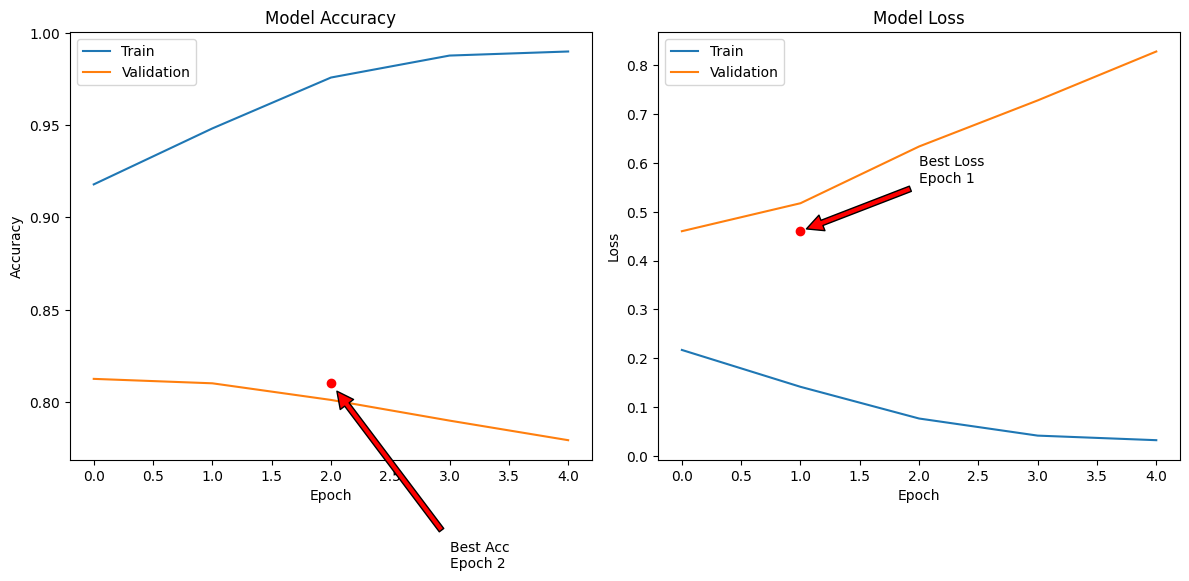

Best Validation Accuracy: 0.8126 at epoch 1
Best model saved at best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
# Plot the training history
# Plot the training history
def plot_history(history, best_epoch):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Highlight the best accuracy epoch
    plt.scatter(best_epoch, history.history['val_accuracy'][best_epoch-1], c='red', marker='o')
    plt.annotate(f'Best Acc\nEpoch {best_epoch}',
                 xy=(best_epoch, history.history['val_accuracy'][best_epoch-1]),
                 xytext=(best_epoch+1, history.history['val_accuracy'][best_epoch-1]-0.1),
                 arrowprops=dict(facecolor='red', shrink=0.05),
                 )

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Highlight the best loss epoch
    best_loss_epoch = np.argmin(history.history['val_loss']) + 1
    plt.scatter(best_loss_epoch, history.history['val_loss'][best_loss_epoch-1], c='red', marker='o')
    plt.annotate(f'Best Loss\nEpoch {best_loss_epoch}',
                 xy=(best_loss_epoch, history.history['val_loss'][best_loss_epoch-1]),
                 xytext=(best_loss_epoch+1, history.history['val_loss'][best_loss_epoch-1]+0.1),
                 arrowprops=dict(facecolor='red', shrink=0.05),
                 )

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_history(history, best_epoch)

# Find the epoch with the best validation accuracy
best_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_acc = history.history['val_accuracy'][best_epoch - 1]
print(f"Best Validation Accuracy: {best_val_acc:.4f} at epoch {best_epoch}")

# Save the model with the best validation accuracy
best_model_path = 'best_model.h5'
model.save(best_model_path)
print(f"Best model saved at {best_model_path}")

In [45]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

782/782 [==============================] - 12s 16ms/step - loss: 0.7890 - accuracy: 0.7839
Test Loss: 0.7890, Test Accuracy: 0.7839


In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import imdb
import numpy as np

# Load the IMDB dataset
max_features = 10000  # Number of most frequent words to consider
maxlen = 100  # Cut texts after this number of words
(_, _), (_, _) = imdb.load_data(num_words=max_features)

# Function to preprocess new text data
def preprocess_text(text):
    # Tokenize and pad the input text
    sequence = [imdb.get_word_index().get(word.lower(), 2) for word in text.split()]
    sequence = pad_sequences([sequence], maxlen=maxlen)
    return sequence

# Load the trained model
best_model_path = 'best_model.h5'  # Replace with the actual path to the best saved model
model = load_model(best_model_path)

# Example text for inference
new_text = "This movie is amazing! I loved every moment of it."

# Preprocess the new text
input_data = preprocess_text(new_text)

# Make predictions
prediction = model.predict(input_data)

# Print the result
if prediction > 0.5:
    print(f'The model predicts: Positive sentiment (Probability: {prediction[0, 0]:.4f})')
else:
    print(f'The model predicts: Negative sentiment (Probability: {1 - prediction[0, 0]:.4f})')

1/1 [==============================] - 0s 151ms/step
The model predicts: Positive sentiment (Probability: 0.9494)


### 3.LSTM

![](https://camo.githubusercontent.com/16236614c1129886768ac4084b45aa9d33fbae3dc08cee2e992b1d28c0cb7c67/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f3838302f312a676f4a5651732d70396b674c4f44464e79686c397a412e676966)

Epoch 1/5
625/625 [==============================] - 23s 33ms/step - loss: 0.4297 - accuracy: 0.7940 - val_loss: 0.3608 - val_accuracy: 0.8466
Epoch 2/5
625/625 [==============================] - 8s 13ms/step - loss: 0.2607 - accuracy: 0.8960 - val_loss: 0.3601 - val_accuracy: 0.8506
Epoch 3/5
625/625 [==============================] - 6s 10ms/step - loss: 0.1928 - accuracy: 0.9276 - val_loss: 0.3881 - val_accuracy: 0.8446
Epoch 4/5
625/625 [==============================] - 7s 12ms/step - loss: 0.1429 - accuracy: 0.9501 - val_loss: 0.4657 - val_accuracy: 0.8368
Epoch 5/5
625/625 [==============================] - 6s 9ms/step - loss: 0.1043 - accuracy: 0.9645 - val_loss: 0.5020 - val_accuracy: 0.8336


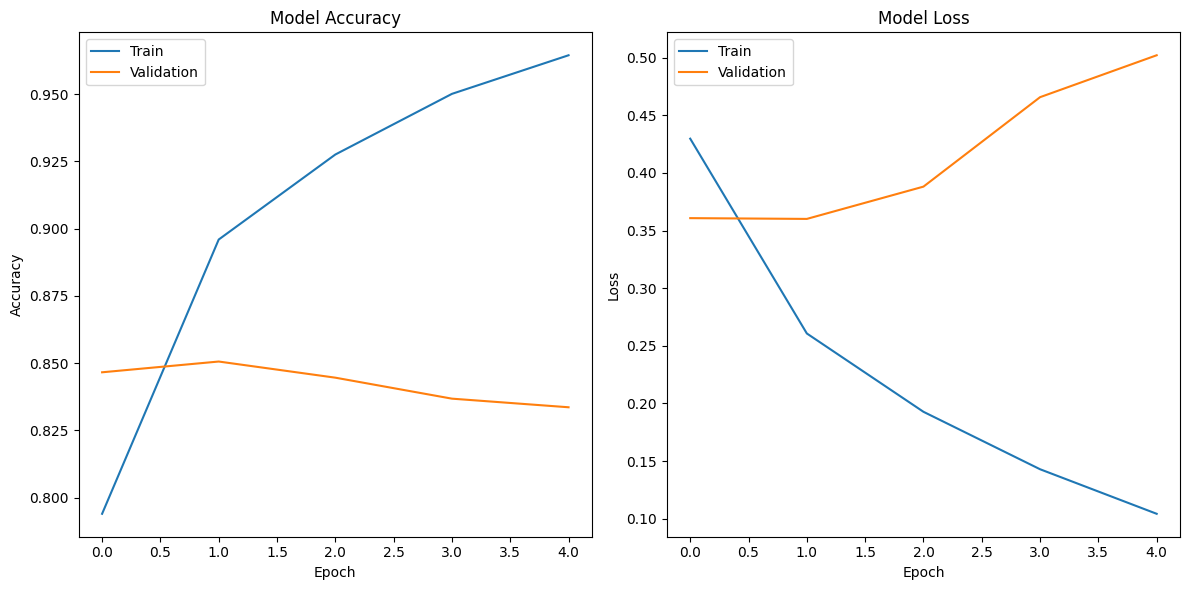

Best Validation Accuracy: 0.8506 at epoch 2
Best model saved at best_lstm_model.h5


In [50]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

# Load the IMDB dataset
max_features = 10000  # Number of most frequent words to consider
maxlen = 100  # Cut texts after this number of words
batch_size = 32

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

# Preprocess the data
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Build the LSTM model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and save the best model based on validation loss
history = model.fit(train_data, train_labels, epochs=5, batch_size=batch_size, validation_split=0.2)

# Plot the training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_history(history)

# Find the epoch with the best validation accuracy
best_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_acc = history.history['val_accuracy'][best_epoch - 1]
print(f"Best Validation Accuracy: {best_val_acc:.4f} at epoch {best_epoch}")

# Save the model with the best validation accuracy
best_model_path = 'best_lstm_model.h5'
model.save(best_model_path)
print(f"Best model saved at {best_model_path}")

In [52]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import imdb
import numpy as np

# Load the IMDB dataset
max_features = 10000  # Number of most frequent words to consider
maxlen = 100  # Cut texts after this number of words
(_, _), (_, _) = imdb.load_data(num_words=max_features)

# Function to preprocess new text data
def preprocess_text(text):
    # Tokenize and pad the input text
    sequence = [imdb.get_word_index().get(word.lower(), 2) for word in text.split()]
    sequence = pad_sequences([sequence], maxlen=maxlen)
    return sequence

# Load the trained LSTM model
best_lstm_model_path = 'best_lstm_model.h5'  # Replace with the actual path to the best LSTM saved model
lstm_model = load_model(best_lstm_model_path)

# Example text for inference
new_text = "This movie is amazing! I loved every moment of it."

# Preprocess the new text
input_data = preprocess_text(new_text)

# Make predictions using LSTM model
prediction = lstm_model.predict(input_data)

# Print the result
if prediction > 0.5:
    print(f'The LSTM model predicts: Positive sentiment (Probability: {prediction[0, 0]:.4f})')
else:
    print(f'The LSTM model predicts: Negative sentiment (Probability: {1 - prediction[0, 0]:.4f})')

1/1 [==============================] - 0s 381ms/step
The LSTM model predicts: Negative sentiment (Probability: 0.8316)


### 4.GRU

![](https://camo.githubusercontent.com/7a7385635a48f1aa5b003f0018af2707b0065497d5f132025a9554bdb8aeb317/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f3838302f312a467052533043334548516e454c5661575276623862672e676966)

In [54]:
# Excersize you have to design similar code for GRU
## https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU